# JD filtering

## Import modules

In [2]:
!pip install toml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from astropy.coordinates import SkyCoord
from functools import partial
import os
os.environ['ucac4_path'] = '/home/jovyan/work/support/ucac4/UCAC4'
os.chdir('/home/jovyan/work/src')
import do_charts_vast
import reading
import utils
from star_description import StarDescription
%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

You are using pip version 19.0.3, however version 21.1.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
found environ with ucac4 path /home/jovyan/work/support/ucac4/UCAC4


## Supporting functions

In [3]:
def massage_df_for_phase_plot(df: DataFrame):
    df['floatJD'] = df['JD'].astype(np.float)
    df['realV'] = df['Vrel']
    df['realErr'] = df['err']
    return df

In [4]:
def read_light_curve(star_id):
    df = reading.read_lightcurve_vast(f"../tests/data/outliers/out{star_id:05}.dat")
    return massage_df_for_phase_plot(df)

def plot_star(star_id, jdfilters):
    df = read_light_curve(star_id)
    if jdfilters is not None:
        print("before filtering: ", len(df))
        df = utils.jd_filter_df(df, jdfilters)
        print("after filtering: ", len(df))
    return plot_star_df(star_id, df, None)

def plot_star_df(star_id, df, cleaning_func):
    star = StarDescription(local_id=star_id, coords=SkyCoord(ra=5.6, dec=-72, unit='deg'))
    print("curve before cleaning:", len(df))
    period = do_charts_vast.calculate_ls_period_from_df(df)
    print("using period", period)
    plt, t, lc = do_charts_vast.plot_lightcurve_raw(star, df, "bla", write_plot=False)
    print("curve after cleaning:", len(lc))
    plt.show()
    return t, lc

def none_phase_filter(time, lc):
    return time, lc

## Reading light curves

In [30]:
test_curve = read_light_curve(3855)
print(len(test_curve))
test_curve['floatJD'].describe()
print(test_curve['realV'].describe(percentiles=[.01,.99]))
x = test_curve['realV']
min_val, max_val = np.percentile(x, [1,99])
print(min_val, max_val)
ymin_arg, ymax_arg = np.argmin(np.abs(x - min_val)), np.argmin(np.abs(x - max_val))
print(ymin_arg, ymax_arg, x[ymin_arg], x[ymax_arg])
#epoch_min, epoch_max = t_np.iloc[ymin_arg], t_np.iloc[ymax_arg]
#ymin, ymax = y_np.iloc[ymin_arg], y_np.iloc[ymax_arg]


8086
count    8086.000000
mean       -9.313374
std         0.128040
min       -10.034418
1%         -9.527003
50%        -9.335347
99%        -9.007466
max        -8.799410
Name: realV, dtype: float64
-9.52700276 -9.007466458
6736 851 -9.52697372 -9.00748348


before filtering:  8086
after filtering:  7047
curve before cleaning: 7047
using period period(period=0.14677465279993088, origin='LS')
curve after cleaning: 7047


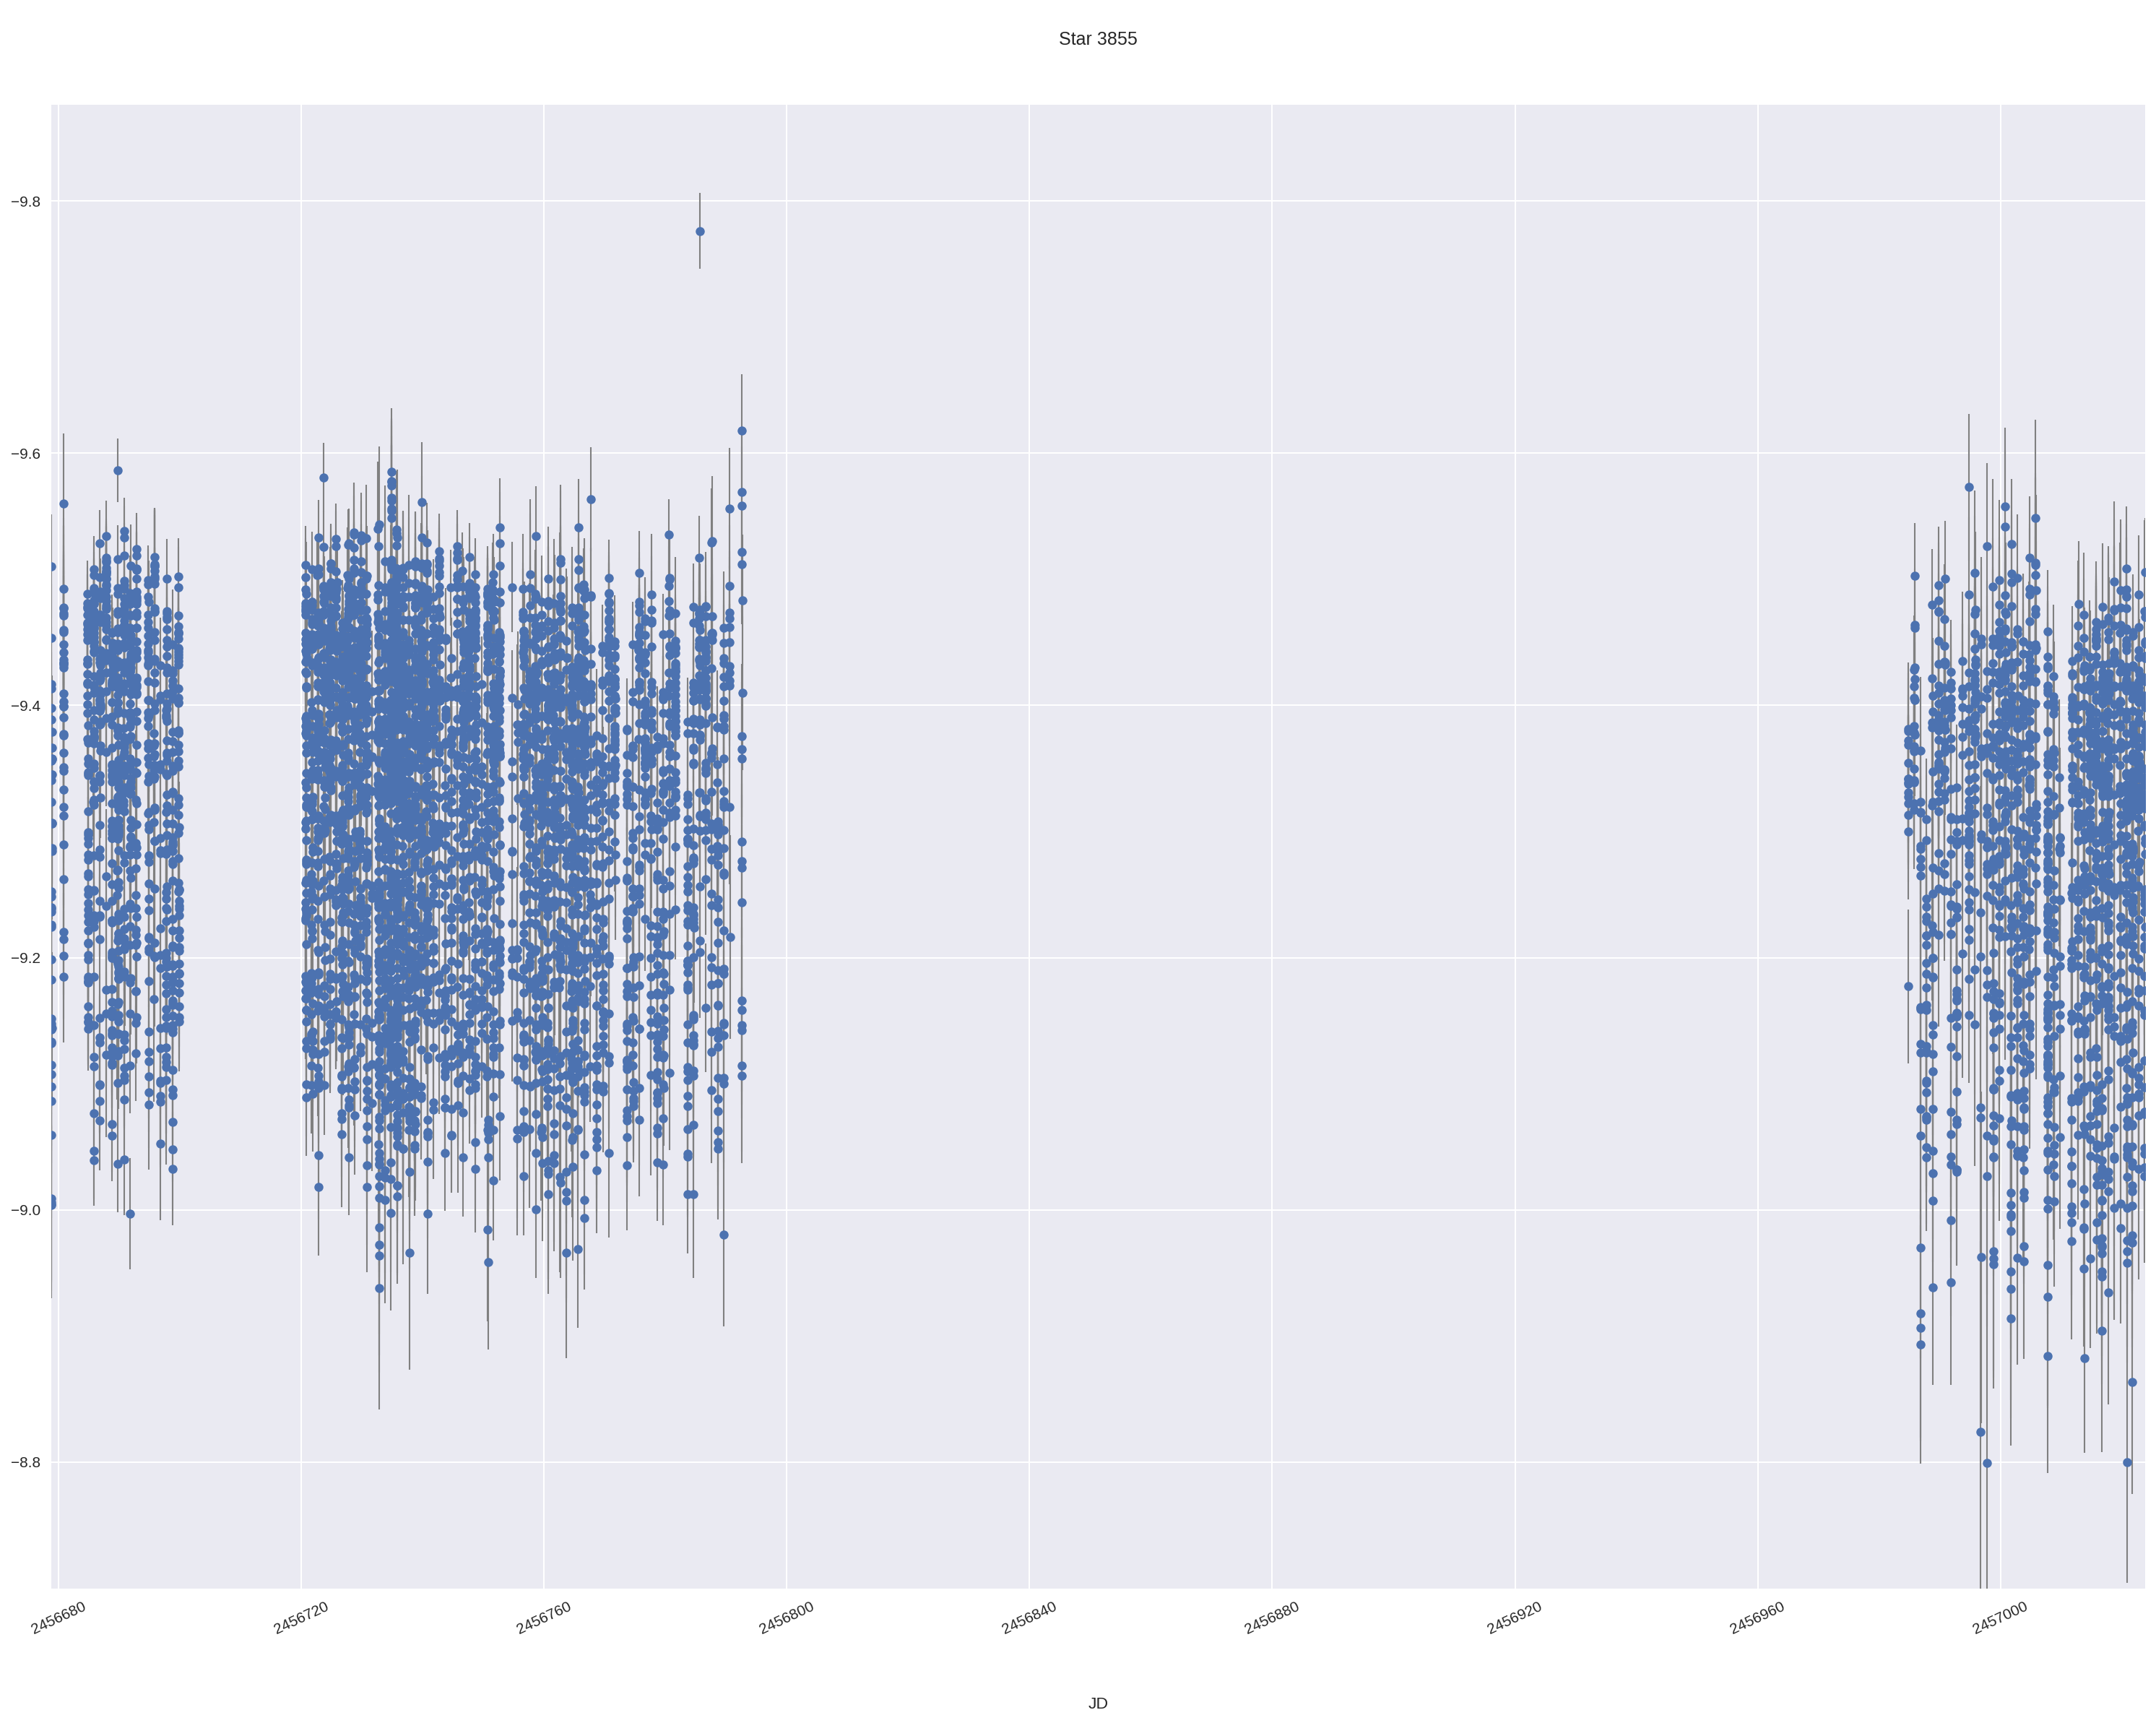

CPU times: user 17 s, sys: 925 ms, total: 17.9 s
Wall time: 16.1 s


In [6]:
stars = [3855, 7668, 9235]
one_star = [3855]
t=[]
lc=[]
def plot_stars(stars, outlier_func):
    for star in stars:
        t, lc = plot_star(star, [2456700.0, 2456720.0])

%time plot_stars(one_star, none_phase_filter)

before filtering:  8086
after filtering:  7047
curve before cleaning: 7047
using period period(period=0.14677465279993088, origin='LS')
curve after cleaning: 7047


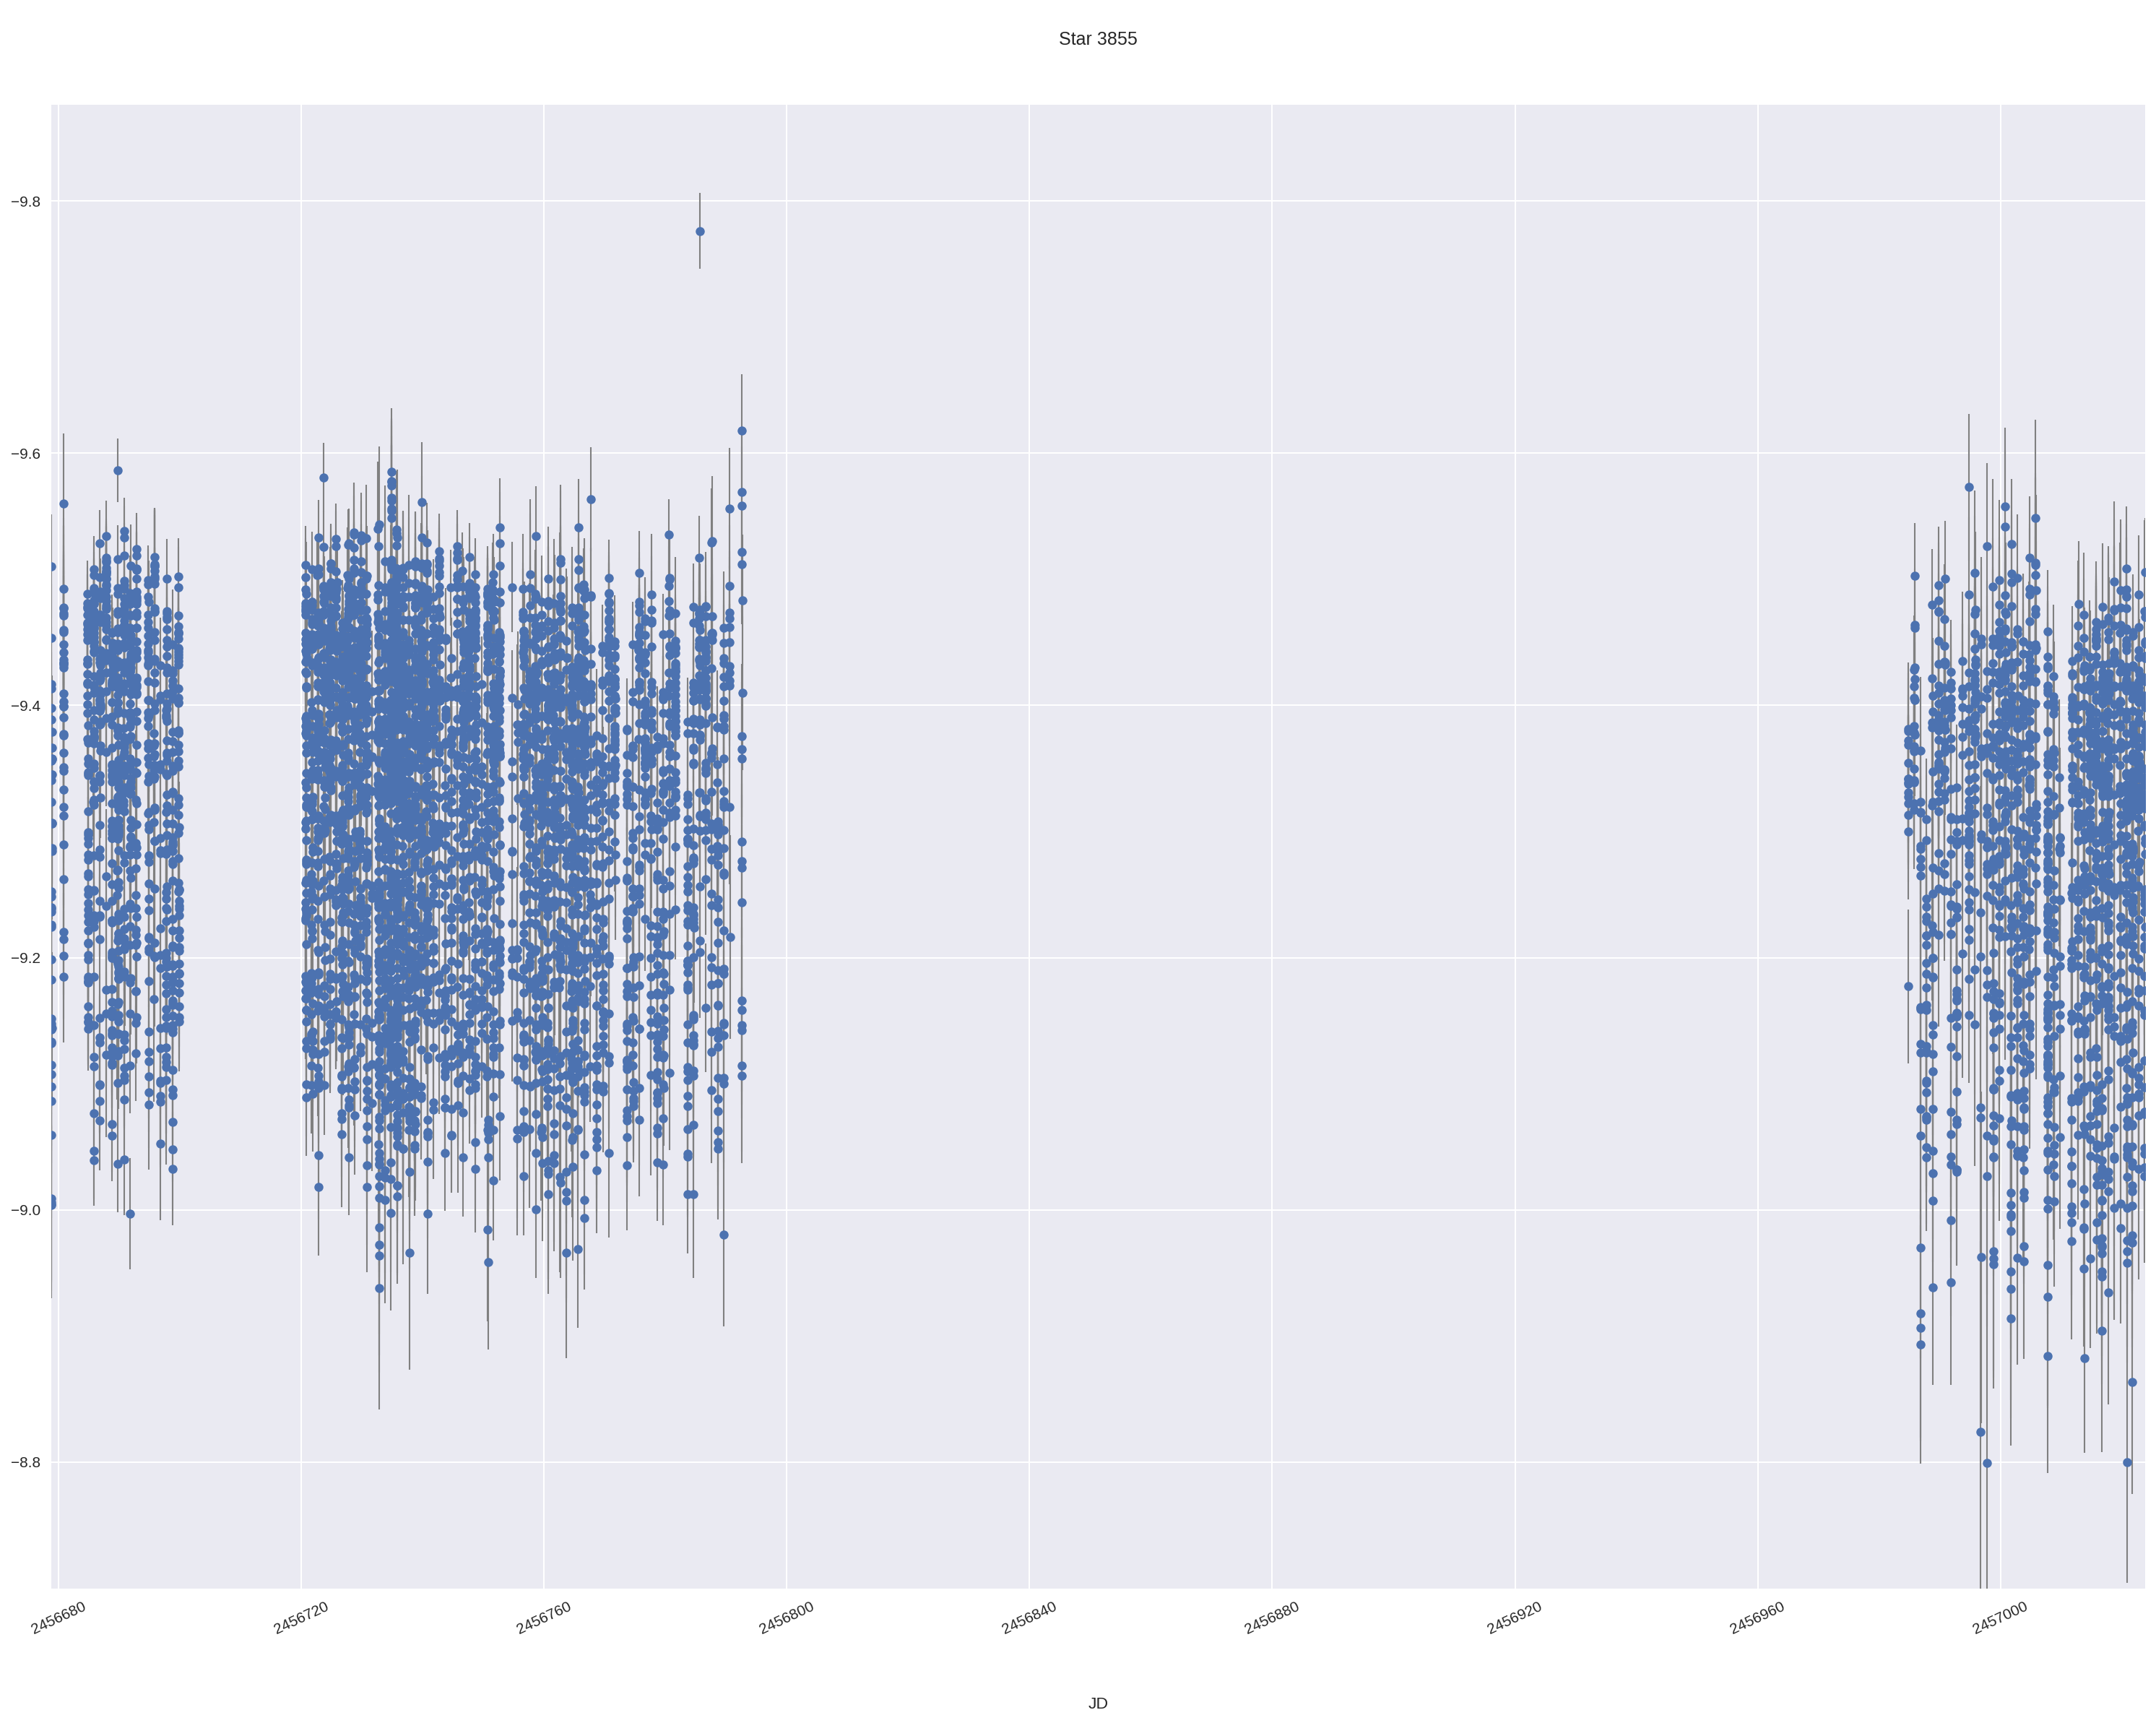

In [7]:
t, lc = plot_star(3855, [2456700.0, 2456720.0])


In [8]:
t

0       2.456687e+06
2       2.456770e+06
4       2.456764e+06
5       2.456753e+06
7       2.456734e+06
8       2.456693e+06
9       2.456743e+06
10      2.456988e+06
12      2.456725e+06
13      2.456748e+06
14      2.456729e+06
15      2.456689e+06
16      2.456729e+06
17      2.457013e+06
18      2.456691e+06
19      2.456728e+06
20      2.456780e+06
21      2.456759e+06
22      2.456764e+06
24      2.457017e+06
25      2.456775e+06
26      2.456742e+06
28      2.456766e+06
29      2.456735e+06
30      2.456759e+06
31      2.456741e+06
32      2.456727e+06
33      2.456759e+06
34      2.457012e+06
35      2.456787e+06
            ...     
8053    2.456728e+06
8054    2.456778e+06
8055    2.457021e+06
8056    2.456762e+06
8057    2.456774e+06
8058    2.456739e+06
8059    2.456757e+06
8060    2.456771e+06
8061    2.456753e+06
8062    2.456728e+06
8063    2.456737e+06
8064    2.457021e+06
8065    2.457016e+06
8067    2.456771e+06
8068    2.456692e+06
8069    2.456776e+06
8070    2.456

In [8]:
sortedt = t.sort_values()

In [9]:
sortedt.describe()

count    7.047000e+03
mean     2.456804e+06
std      1.173315e+02
min      2.456679e+06
25%      2.456732e+06
50%      2.456752e+06
75%      2.456789e+06
max      2.457024e+06
Name: realJD, dtype: float64

In [21]:
df = DataFrame(sortedt)
df['floatJD'] = df['realJD']
df2 = utils.jd_filter_df(df, [2.456679e+06, 2.457024e+06 ])
print(len(df), len(df2))


7047 45
